# Install the Required Packages

In [9]:
# !pip install numpy pandas matplotlib seaborn scikit-learn
# !pip install cmdstanpy

# !pip install arviz

In [12]:
import os
import sys
import pickle
from pathlib import Path
import arviz as az

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cmdstanpy
from cmdstanpy import CmdStanModel, cmdstan_path
# cmdstanpy.install_cmdstan()

import logging
logging.getLogger("cmdstanpy").setLevel(logging.INFO)

## Import the Prevalence Data

In [13]:
prevalence = pd.read_csv("./Data/flu_data.csv")

In [14]:
prevalence.head()

,date,in_bed,convalescent
0,1978-01-22,3,0
1,1978-01-23,8,0
2,1978-01-24,26,0
3,1978-01-25,76,0
4,1978-01-26,225,9


In [19]:
prevalence.describe()

,in_bed,convalescent
count,14.000000,14.000000
mean,111.357143,66.928571
std,107.768703,71.140667
min,3.000000,0.000000
25%,17.000000,2.250000
50%,72.000000,33.500000
75%,216.000000,138.750000
max,298.000000,176.000000


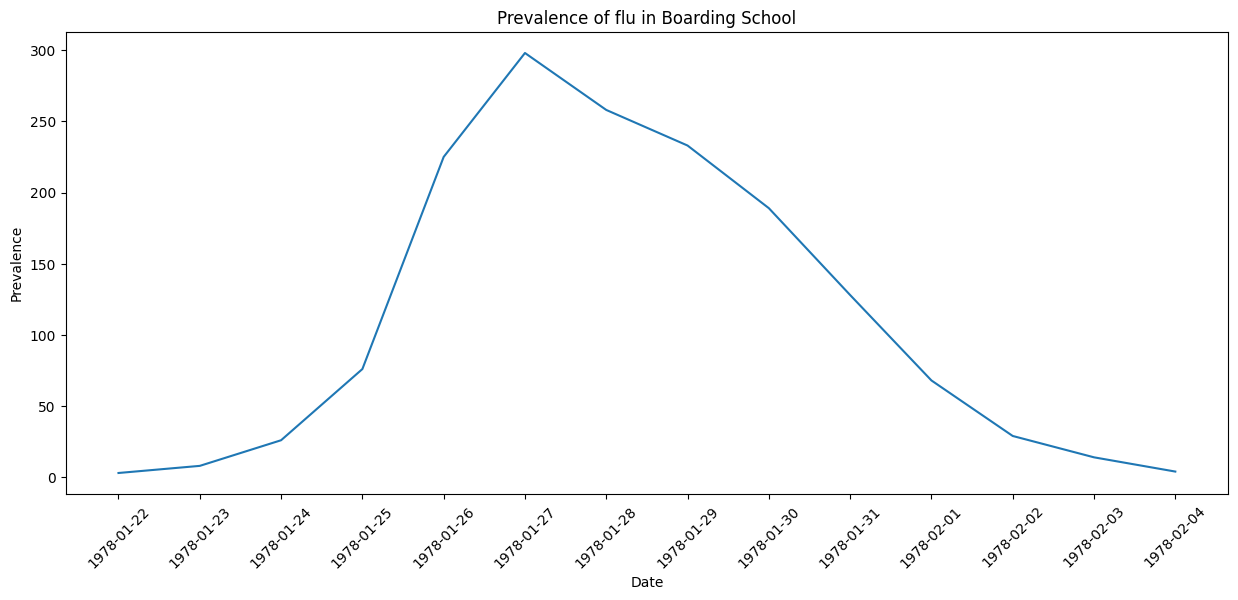

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(prevalence["date"], prevalence["in_bed"], label="Positive")
plt.title("Prevalence of flu in Boarding School")
plt.xlabel("Date")
plt.ylabel("Prevalence")
plt.xticks(rotation=45)
plt.show()

# Prepare the data for the model fitting

In [ ]:
# Set the population size
N = 763

# Define initial conditions
i0 = 1
e0 = 0
s0 = N - i0
r0 = 0
y0 = [s0, e0, i0, r0]

# Make the data structure
stan_data = {
    "n_days": len(prevalence.in_bed),
    "y0": y0,
    "t0": 0,
    "t": np.arange(1, len(prevalence.in_bed)+1),
    "N": N,
    "cases": prevalence.in_bed
}

# Compile the Model